# Introduction to Random Numbers

When we mention stochastic processes, we tend to think of coin tosses and dice throws. Physics students might also think of the decay of radioactive nucleotides. All stochastic processes have this in common: their outcomes are unpredictable, but governed by some probability distribution.

For example, for a coin toss, the outcome can be a head, or a tail, but until the coin is tossed, we cannot know whether it will come up head or tail. Both outcomes are equally likely.

Another example, for a dice throw, there are six possible outcomes, $\{1, 2, 3, 4, 5, 6\}$. All outcomes are equally likely, and again, until the dice is thrown, we do not know what the outcome will be.

In many problems that contain a stochastic process, we have to directly simulate the stochastic process. For example, for a coin toss, if we map the outcomes to head (1) and tail (0), a sequence of coin tosses can be written as 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, $\dots$.

How do we simulate such a sequence of coin tosses, so that outcomes of successive tosses are unpredictable?

This is where random number generators come in.

## Linear Congruential Generators

This is perhaps a little unintuitive, but we generate 'random' numbers using a deterministic function of the form
\begin{equation}
x_{n+1} = (a x_n + b) \mod m,
\end{equation}
where $x_n$ and $x_{n+1}$ are <em>iterates</em> of the function, which has parameters $a$, $b$, and $m$, which are all integers. Such a function is called a <em>linear congruential generator</em>.

In practice, $m$ needs to be a prime number, and we also need to choose $x_0$, the first integer to get the function going. $x_0$ is called the <em>seed</em> of the random number sequence.

Because the sequence of numbers obtained is deterministic, we call 'random' numbers generated this way <em>pseudorandom</em> numbers.

In the following, let us experiment with a simple linear congruential generator with $a = 3$, $b = 7$, and $m = 17$.

In [1]:
a = 3
b = 7
m = 17
x0 = 1
for n in range(15):
    x = (a*x0 + b) % m
    print(n, x)
    x0 = x
    

0 10
1 3
2 16
3 4
4 2
5 13
6 12
7 9
8 0
9 7
10 11
11 6
12 8
13 14
14 15


As we can see, successive outputs of the linear congruential generator are between 0 and 16, but they do not seem to be predictable.

However, if we sample more than 15 iterates, we will end up with the situation shown below:

In [2]:
a = 3
b = 7
m = 17
x0 = 1
for n in range(25):
    x = (a*x0 + b) % m
    print(n, x)
    x0 = x
    

0 10
1 3
2 16
3 4
4 2
5 13
6 12
7 9
8 0
9 7
10 11
11 6
12 8
13 14
14 15
15 1
16 10
17 3
18 16
19 4
20 2
21 13
22 12
23 9
24 0


Here we see that after the $(m-1) = 16$th iterate, the sequence repeats itself perfectly, i.e. the sequence of pseudorandom numbers is periodic, with period $m-1$.

All linear congruential generated random numbers is limited by its period.
If $m$ is a prime, then the period is $m - 1$. If $m$ is not a prime, then this period may be shorter. Let us check that this is the case, by trying $m = 16$.

In [3]:
a = 3
b = 7
m = 16
x0 = 1
for n in range(25):
    x = (a*x0 + b) % m
    print(n, x)
    x0 = x

0 10
1 5
2 6
3 9
4 2
5 13
6 14
7 1
8 10
9 5
10 6
11 9
12 2
13 13
14 14
15 1
16 10
17 5
18 6
19 9
20 2
21 13
22 14
23 1
24 10


Indeed, instead of repeating after $m - 1 = 15$ iterations, the sequence starts repeating itself after 8 iterations. The consequence of this shorter period is that some numbers between 0 and 15 do not appear at all (for the choice of seed $x_0 = 1$.

We can of course choose a larger prime number, say $m = 173$, but this just means that the period is $m - 1 = 172$, which is not large.

In a typical Monte Carlo simulation, we will need $10^6$ to $10^9$ random numbers. This tells us that we must use a prime that is very large, otherwise the sequence of pseudorandom numbers will start repeating itself, and the 'randomness' of the simulation will not be good.

One method to increase the period of a random number generator is to use two linear congruential generators, with $m_1$ and $m_2$. Most of the time, this improves the 'randomness' of the sequence, and also increase the period to $m_1 m_2 - 1$.

## Mersenne Twister Algorithm

A Mersenne prime is one which has the form $2^n - 1$, although not all integers of the form $2^n - 1$ are prime.

The Mersenne Twister random number generator is so named because its period is a Mersenne prime. Specifically, $m = 2^{19937} - 1$. This is a prime that has 6002 digits. Therefore, the period of this random number generator is very much longer than the 32-bit random number generator in C, which has period $2^{32} = 4,294,967,296$ or $2^{40} = 1,099,511,627,776$. In a typical Monte Carlo simulation using the Mersenne Twister, we will never run out of random numbers before they repeat themselves.

The Mersenne Twister was developed in 1997 by Makoto Matsumoto (松本 眞) and Takuji Nishimura (西村 拓士) to rectify most of the flaws found in older random number generators. You may refer to <a href="https://en.wikipedia.org/wiki/Mersenne_Twister">https://en.wikipedia.org/wiki/Mersenne_Twister</a> for details on the algorithm.

The Mersenne Twister has many advantages over older random number generators, and is now standard in MATLAB, Octave, Python, and R. Newer and better random number generators exist, but they are not yet as popular as the Mersenne Twister.

In the following, let us demonstrate another advantage of the Mersenne Twister random number generator over the linear congruential generator with $m = 173$, by plotting $x_{n+1}$ against $x_n$.

In [4]:
import matplotlib.pyplot as plt
m = 173
for n in range(150):
    x = (a*x0 + b) % m
    plt.plot(x0, x, 'o')
    x0 = x
plt.show()

<Figure size 640x480 with 1 Axes>

As we can see, $(x_n, x_{n+1})$ form stripes in the graph. This means that, even though we may not be able to guess $x_{n+1}$ from $x_n$, the number sequence created by the linear congruential generator has long-range correlations that makes them less random than they actually seem.

Next, let us test a sequence of 150 numbers generated by Mersenne Twister.

In [14]:
import numpy as np
import matplotlib.pyplot as plt
r = np.random.rand(100)

[0.7512713  0.64308881 0.07750437 0.23606786 0.22448839 0.65035208
 0.37673332 0.00358827 0.14937448 0.63356042 0.0362066  0.43077067
 0.53958409 0.84212155 0.60675014 0.06814724 0.08575306 0.87844305
 0.98999447 0.30035602 0.41214017 0.70247736 0.63949463 0.2631961
 0.86050705 0.54001217 0.32786156 0.09608786 0.01258317 0.0154029
 0.81236261 0.3628224  0.87036498 0.77247798 0.9068419  0.05473882
 0.86569549 0.95776856 0.57439541 0.6399611  0.43294082 0.20725581
 0.52284089 0.44584637 0.79726789 0.44108687 0.66263813 0.27964105
 0.44675965 0.86694064 0.82373011 0.0730695  0.84684176 0.98273118
 0.07695351 0.84478266 0.08267167 0.78787248 0.09483762 0.26261239
 0.18079323 0.34529034 0.53198271 0.50312601 0.70449129 0.8912639
 0.10734506 0.25344554 0.84689454 0.307472   0.09356969 0.31019353
 0.19624252 0.6196553  0.59569041 0.97537647 0.71122616 0.67902584
 0.69593009 0.00666838 0.03273196 0.91977654 0.20193843 0.72486999
 0.84582874 0.51167736 0.98565921 0.26598723 0.27815386 0.9587250

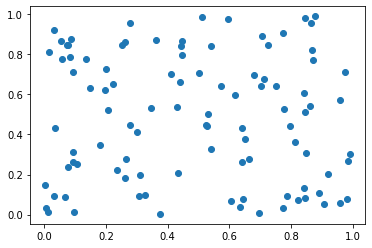

In [15]:
plt.plot(r[0:-1], r[1:], 'o')
print (r[0:-1])
print (r[1:])
plt.show()



From the graph we see no obvious correlations in the sequence of 150 numbers.